<a href="https://colab.research.google.com/github/avijit7074/price_prediction_gurgaon/blob/master/eda_univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv("/content/gurgaon_flat_house_joined1_cleaned_v2.csv")

In [3]:
df.sample(5)

,property_type,society,sector,price_in_cr,price_per_sq.ft,total_area,areaWithType,bedrooms,bathrooms,balconies,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study_room,servant_room,store_room,pooja_room,others,furnishing_type,luxury_score
1028,flat,ambience creacions,sector 22,4.30,13915.0,3090.0,Super Built up area 3090(287.07 sq.m.)Built Up...,3,4,3+,6.0,South-West,Relatively New,3090.0,2600.0,2100.0,0,1,0,0,1,2,120
2148,flat,apna enclave,sector 3,0.58,6105.0,950.0,Super Built up area 950(88.26 sq.m.)Built Up a...,2,2,2,2.0,North-East,Old Property,950.0,900.0,744.0,0,0,0,0,0,0,66
745,flat,denso haryana housing society,sector 1,0.90,4308.0,2089.0,Carpet area: 2089 (194.07 sq.m.),3,3,3+,5.0,East,Moderately Old,NaN,NaN,2089.0,0,1,0,0,0,0,7
1119,flat,tulip violet,sector 69,1.40,8861.0,1580.0,Super Built up area 1578(146.6 sq.m.),3,3,2,2.0,North-East,Relatively New,1578.0,NaN,NaN,0,0,0,1,0,0,102
2033,flat,unitech sunbreeze,sector 69,0.75,6849.0,1095.0,Super Built up area 1095(101.73 sq.m.),2,2,2,4.0,NaN,Under Construction,1095.0,NaN,NaN,0,0,0,0,0,0,0


In [4]:
df.shape

(3940, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3940 entries, 0 to 3939
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3940 non-null   object 
 1   society              3940 non-null   object 
 2   sector               3940 non-null   object 
 3   price_in_cr          3940 non-null   float64
 4   price_per_sq.ft      3940 non-null   float64
 5   total_area           3940 non-null   float64
 6   areaWithType         3940 non-null   object 
 7   bedrooms             3940 non-null   int64  
 8   bathrooms            3940 non-null   int64  
 9   balconies            3940 non-null   object 
 10  floorNum             3921 non-null   float64
 11  facing               2770 non-null   object 
 12  agePossession        3940 non-null   object 
 13  super_built_up_area  1934 non-null   float64
 14  built_up_area        1829 non-null   float64
 15  carpet_area          1999 non-null   f

In [6]:
df.duplicated().sum()

128

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(3812, 23)

In [9]:
df.head()

,property_type,society,sector,price_in_cr,price_per_sq.ft,total_area,areaWithType,bedrooms,bathrooms,balconies,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study_room,servant_room,store_room,pooja_room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 3,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,4.0,West,Relatively New,NaN,NaN,900.0,0,0,0,0,0,0,28
1,flat,apna enclave,sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,1.0,West,Old Property,NaN,NaN,650.0,0,0,0,0,0,1,37
2,flat,tulsiani easy in homes,sector 35,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,12.0,NaN,New Property,NaN,NaN,595.0,0,0,0,0,0,0,36
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,2.0,NaN,Undefined,NaN,NaN,1200.0,1,0,0,0,0,0,76
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2,2,3,5.0,NaN,Under Construction,1345.0,NaN,NaN,1,0,0,0,0,0,0


**PROPERTY_TYPE**

Axes(0.125,0.11;0.775x0.77)


flat     2867
house     945
Name: property_type, dtype: int64

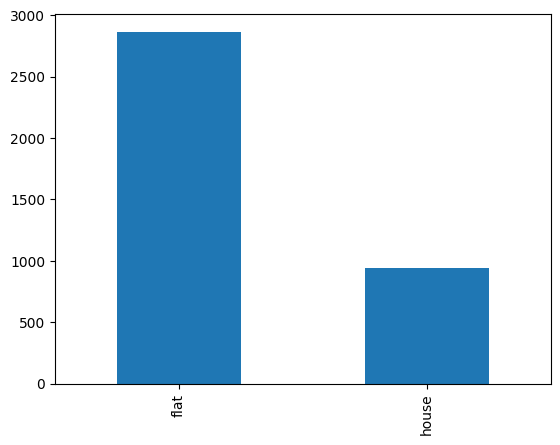

In [10]:
print(df['property_type'].value_counts().plot(kind='bar'))
df['property_type'].value_counts()

**Ovservations**

*   75% of data have property_type as flat and ~25% have property_type as house
*   No null value


**SOCIETY**

In [11]:
df['society'].isnull().sum()

0

In [12]:
df['society'].value_counts()

independent                               566
tulip violet                               75
ss the leaf                                73
shapoorji pallonji joyville gurugram       42
dlf new town heights                       42
                                         ... 
m m residency, krishna colony, gurgaon      1
g l s arawali homes                         1
adarsh nagar                                1
kamal residence                             1
maa bhagwati residency                      1
Name: society, Length: 723, dtype: int64

<Axes: >

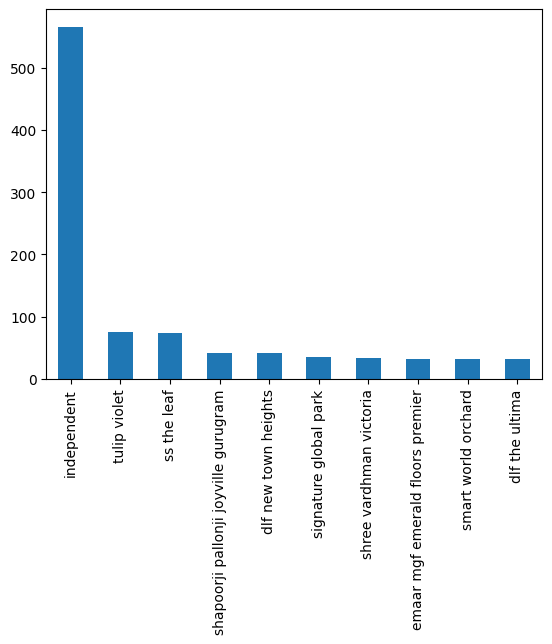

In [13]:
df['society'].value_counts().head(10).plot(kind='bar')

In [14]:
df['society'].value_counts().cumsum().head(75)

independent                              566
tulip violet                             641
ss the leaf                              714
shapoorji pallonji joyville gurugram     756
dlf new town heights                     798
                                        ... 
umang monsoon breeze                    2114
ats kocoon                              2127
indiabulls enigma                       2140
the close north                         2153
central park flower valley              2165
Name: society, Length: 75, dtype: int64

**Observations**
*  ~15% weightage of the society column contained by independent house
* 723 different societies
* ~57% weightage of the society comes from top 75 societies. Remaining  weightage divided into the 648 societies.

**SECTOR**

In [15]:
df.sector.isnull().sum()

0

In [16]:
df.sector.value_counts()

sector 37      120
sector 102     109
sector 85      108
sector 70      104
sector 92       99
              ... 
sector-61        1
sector-7         1
sector-69        1
sector-3         1
sector - 89      1
Name: sector, Length: 125, dtype: int64

<Axes: >

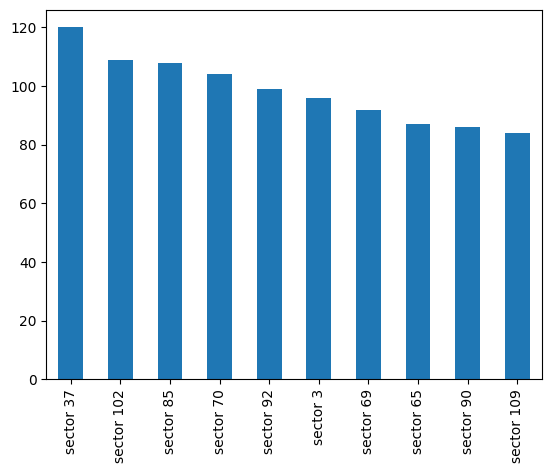

In [17]:
df.sector.value_counts().head(10).plot(kind='bar')

In [18]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 4,
 'High (50-100)': 26,
 'Average (10-49)': 59,
 'Low (2-9)': 22,
 'Very Low (1)': 14}

**Observations**
* No missing value
* 125 different sectors
* 4 sectors have more than 100 countings

**PRICE_IN_CR**

In [19]:
df['price_in_cr'].isnull().sum()

0

In [20]:
df['price_in_cr'].describe()

count    3812.000000
mean        2.500988
std         2.951682
min         0.075000
25%         0.920000
50%         1.500000
75%         2.700000
max        31.500000
Name: price_in_cr, dtype: float64

In [21]:
df[df['price_in_cr']==31.5]

,property_type,society,sector,price_in_cr,price_per_sq.ft,total_area,areaWithType,bedrooms,bathrooms,balconies,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study_room,servant_room,store_room,pooja_room,others,furnishing_type,luxury_score
3851,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.5,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,2,74


In [22]:
df[df['price_in_cr']==0.075]

,property_type,society,sector,price_in_cr,price_per_sq.ft,total_area,areaWithType,bedrooms,bathrooms,balconies,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study_room,servant_room,store_room,pooja_room,others,furnishing_type,luxury_score
3216,house,independent,sector 33,0.075,2525.0,297.0,Plot area 33(27.59 sq.m.),1,1,No,1.0,NaN,Relatively New,NaN,297.0,NaN,0,0,0,0,0,0,0


<Axes: xlabel='price_in_cr', ylabel='Count'>

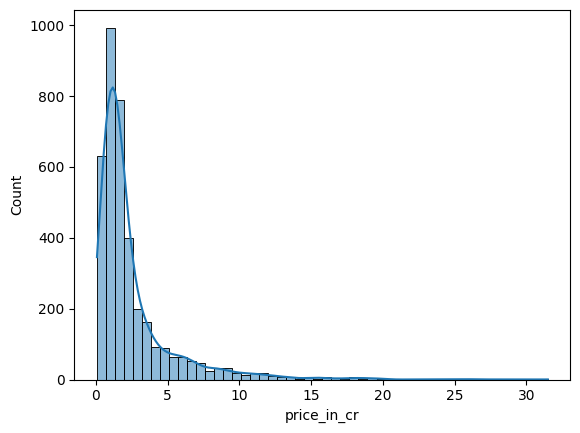

In [23]:
sns.histplot(df['price_in_cr'],kde=True, bins=50)

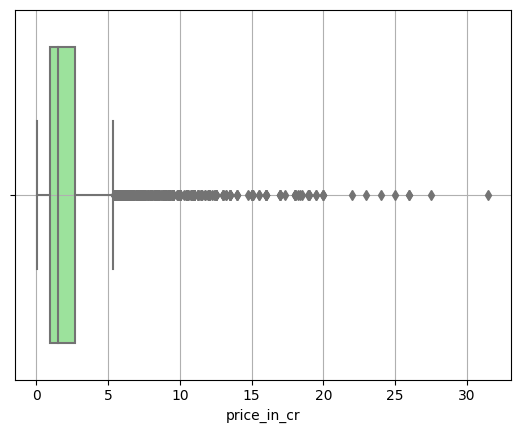

In [24]:
sns.boxplot(x=df['price_in_cr'], color='lightgreen')
plt.grid()

**Observations**
Descriptive Statistics:

* Mean Price: The average price is approximately 2.50 crores.
* Median Price: The median (or 50th percentile) price is 1.50 crores.
* Standard Deviation: The prices have a standard deviation of 2.95, indicating variability in the prices.
* Range: Prices range from a minimum of 0.075 crores to a maximum of 31.5 crores.
* IQR: The interquartile range (difference between 75th and 25th  percentile) is from 0.92 crores to 2.70 crores.
Visualizations:

* Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
* Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.

Missing values: No missing values

In [25]:
# Skewness and Kurtosis
skewness = df['price_in_cr'].skew()
kurtosis = df['price_in_cr'].kurt()

print(skewness,kurtosis)

3.301784044839391 15.181984578027924


**Observations:**
Skewness: The price distribution has a skewness of approximately 3.30, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

Kurtosis: The kurtosis value is approximately 15.18. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [26]:
# Quantile Analysis
quantiles = df['price_in_cr'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.370
0.95     8.490
0.99    15.089
Name: price_in_cr, dtype: float64

**Obsevations**
* 1% property have price below 0.25cr
* 5% property have price below 0.37cr
* 95% property have price below 8.49cr
* 99% property have price below 15.089cr

In [27]:
Q1=df['price_in_cr'].describe()['25%']
Q3=df['price_in_cr'].describe()['75%']
IQR=Q3-Q1
lower_bound=IQR-IQR*1.5
upper_bound=IQR+IQR*1.5
print(lower_bound, upper_bound)

-0.8900000000000001 4.450000000000001


In [28]:
outliers_df=df[(df['price_in_cr']<lower_bound) | (df['price_in_cr']>upper_bound)]

In [29]:
outliers_df.shape

(547, 23)

In [30]:
outliers_df['price_in_cr'].describe()

count    547.000000
mean       8.305576
std        4.019635
min        4.490000
25%        5.555000
50%        7.000000
75%        9.545000
max       31.500000
Name: price_in_cr, dtype: float64

**Observations**
* According to IQR method 547 outliers present in pricr_in_cr column
* mean of outliers is 8.30cr
* std 4.30
* minimun value in outliers 4.49cr
* maximum value in outliers 31.5cr
* upper_bound for outliers is 4.45cr

<Axes: >

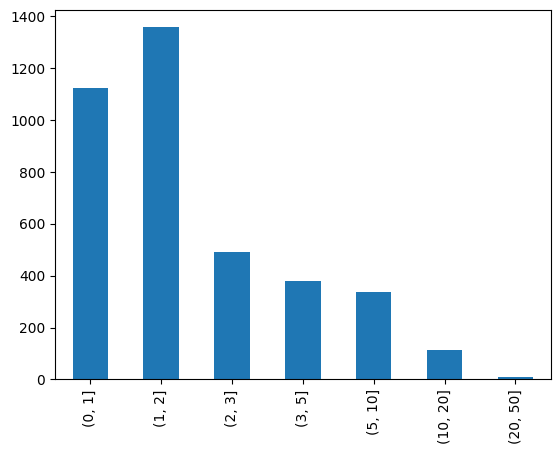

In [31]:
bins=[0,1,2,3,5,10,20,50]
pd.cut(df['price_in_cr'], bins=bins).value_counts().sort_index().plot(kind='bar')

**Obsevations**
* The majority of the properties have a price between 0 and 3 crores
* There is a significant drop in the number of properties priced above 5 cr

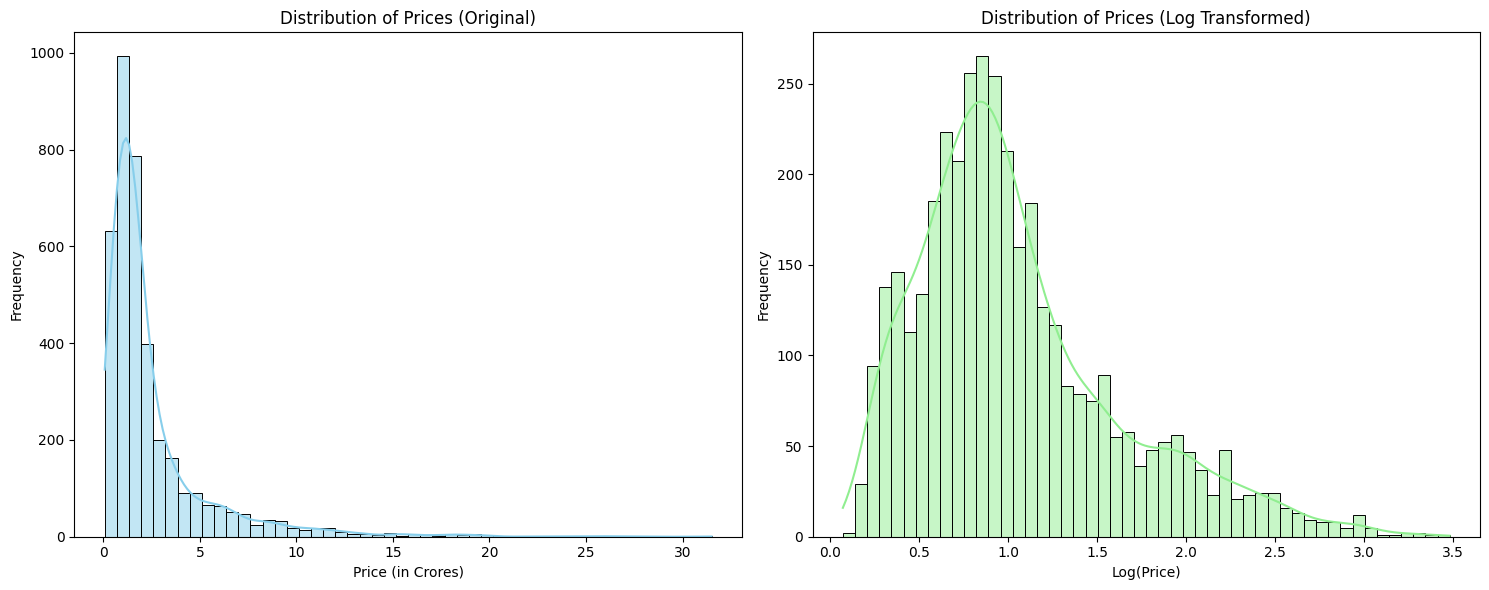

In [32]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price_in_cr'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price_in_cr']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [33]:
skewness = np.log1p(df['price_in_cr']).skew()
kurtosis = np.log1p(df['price_in_cr']).kurt()

print(skewness,kurtosis)

1.0740250038093975 0.9751631867068009


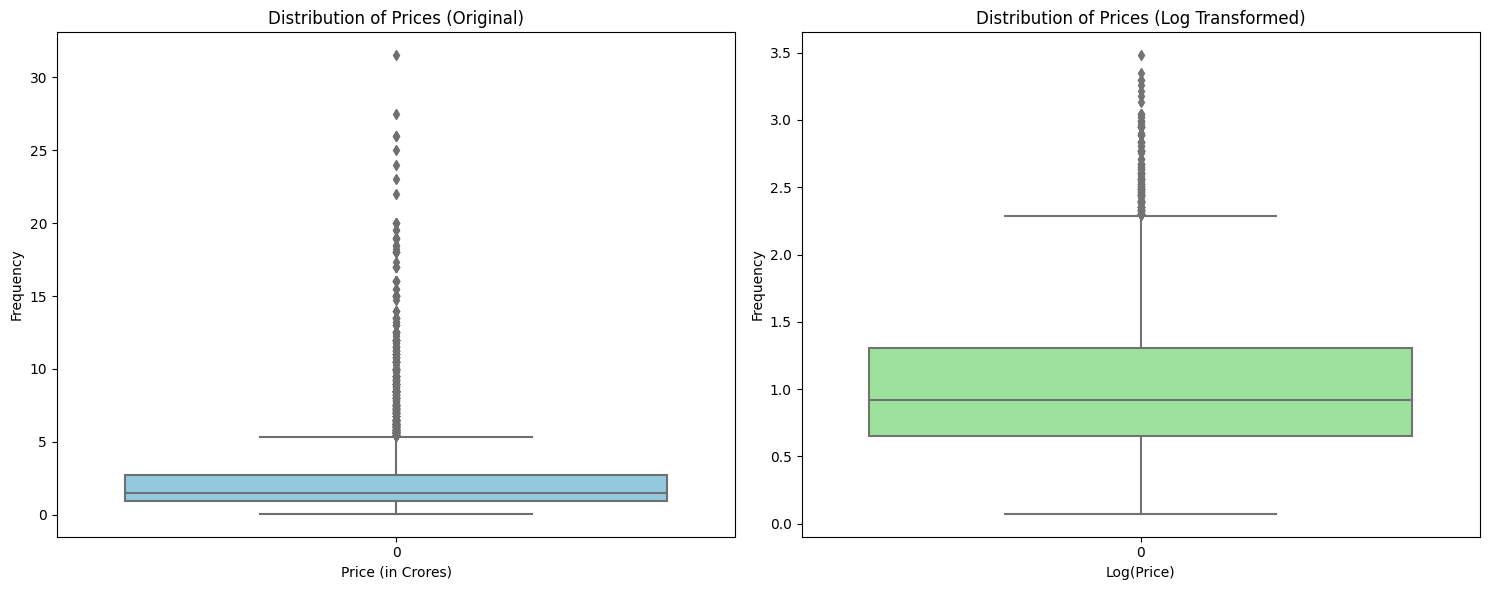

In [34]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price_in_cr'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price_in_cr']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Observations**
* After using log(1+p) transformation we handel the outliers little bit.
* The shape of the curve is also improved

**PRICE_PER_SQ.FT**


In [35]:
df['price_per_sq.ft'].isnull().sum()

0

In [36]:
df['price_per_sq.ft'].describe()

count      3812.000000
mean      14006.986097
std       23345.195014
min           2.000000
25%        6805.000000
50%        9011.000000
75%       13871.250000
max      600000.000000
Name: price_per_sq.ft, dtype: float64

<Axes: xlabel='price_per_sq.ft', ylabel='Count'>

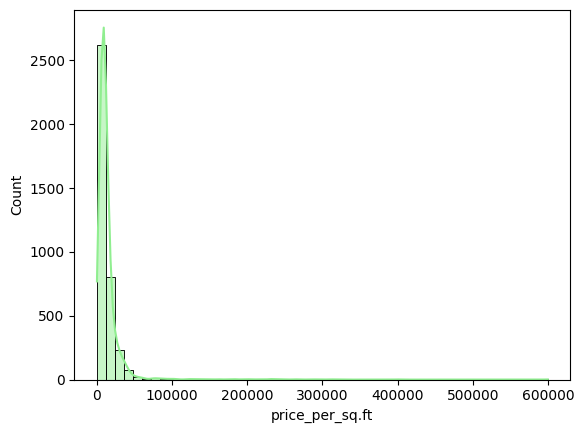

In [37]:
sns.histplot(df['price_per_sq.ft'], kde=True, bins=50, color='lightgreen')

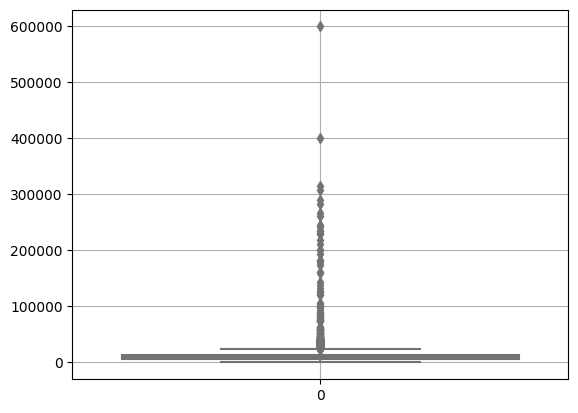

In [38]:
sns.boxplot(df['price_per_sq.ft'], color='lightgreen')
plt.grid()

**Observations**
* Mean value = ~14006 rupees per sq.ft
* std = ~23345
* Min price_per_sq.ft = 2 rupees per sq.ft
* Median = ~9011 rupees per_sq.ft
* Max price_per_sq.ft = 600000
* NO missing values
* A significant number of outliers according to the box plot
* Distribution of Price_per_sq.ft is right skewed


In [39]:
df.columns

Index(['property_type', 'society', 'sector', 'price_in_cr', 'price_per_sq.ft',
       'total_area', 'areaWithType', 'bedrooms', 'bathrooms', 'balconies',
       'floorNum', 'facing', 'agePossession', 'super_built_up_area',
       'built_up_area', 'carpet_area', 'study_room', 'servant_room',
       'store_room', 'pooja_room', 'others', 'furnishing_type',
       'luxury_score'],
      dtype='object')

**BEDROOMS**

In [40]:
df['bedrooms'].isnull().sum()

0

<Axes: >

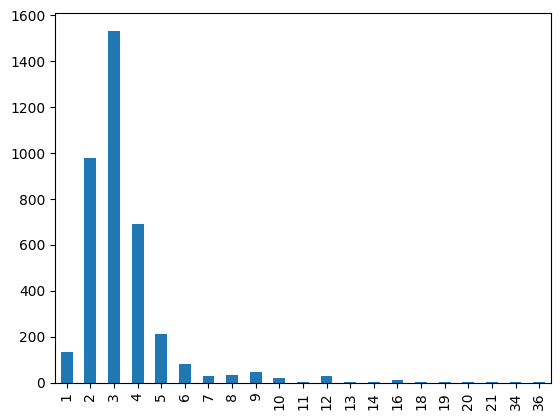

In [41]:
df['bedrooms'].value_counts().sort_index().plot(kind='bar')

<ipython-input-42-48196c885c0c>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_series = top5.append(pd.Series([other], index=['Other']))


<Axes: >

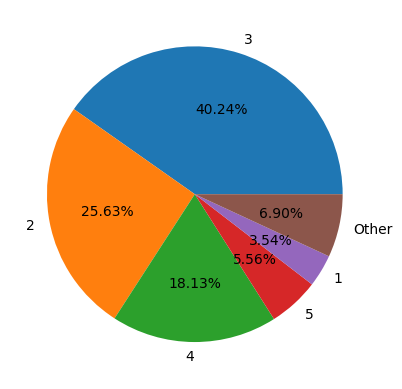

In [42]:
value_counts=df['bedrooms'].value_counts()
top5=value_counts.head()
other=value_counts[5:].sum()
new_series = top5.append(pd.Series([other], index=['Other']))
new_series.plot(kind='pie',autopct='%0.2f%%')

**Observations**
* 2b,3b and 4b property occupies more than 80% from the total properrties.
* No missing value

In [43]:
df['bathrooms'].isnull().sum()

0

<Axes: >

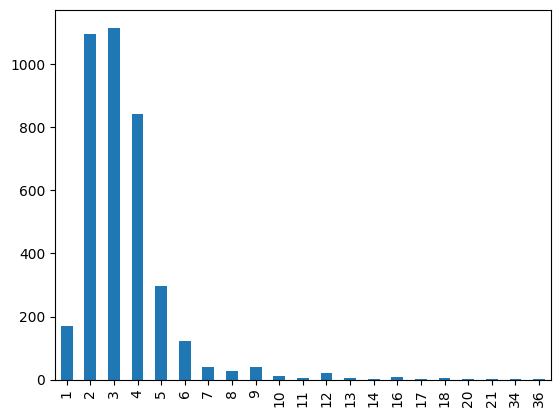

In [44]:
df['bathrooms'].value_counts().sort_index().plot(kind='bar')

In [45]:
df['bathrooms'].describe()

count    3812.000000
mean        3.416055
std         2.053224
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        36.000000
Name: bathrooms, dtype: float64

In [46]:
df.drop(df[df.bathrooms>20].index, inplace=True)

<Axes: >

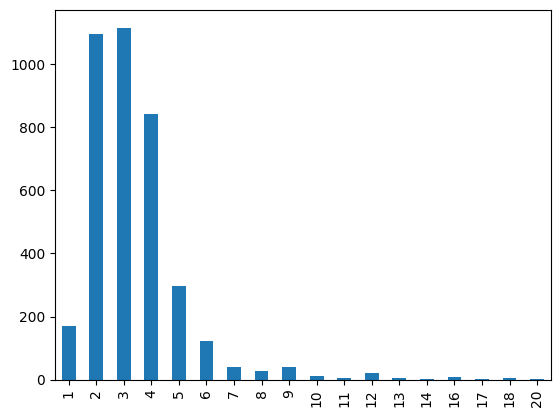

In [47]:
df['bathrooms'].value_counts().sort_index().plot(kind='bar')

<ipython-input-48-596b85709b6a>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_series = top5.append(pd.Series([other], index=['Other']))


<Axes: >

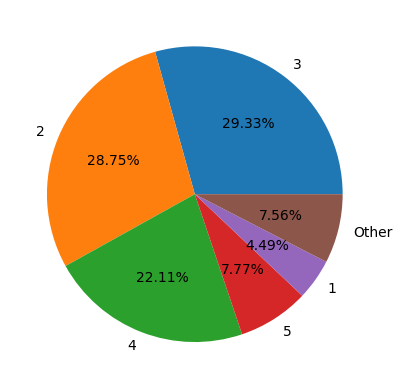

In [48]:
value_counts=df['bathrooms'].value_counts()
top5=value_counts.head()
other=value_counts[5:].sum()
new_series = top5.append(pd.Series([other], index=['Other']))
new_series.plot(kind='pie',autopct='%0.2f%%')

**Observations:**
* No missing value
* ~80% of the property have at most 4 bathrooms
* ~Max number of bathroom = 20
* Median is 3

**BALCONIES**

In [49]:
df['balconies'].isnull().sum()

0

In [50]:
df['balconies'].value_counts()

3+    1183
3     1095
2      924
1      405
No     202
Name: balconies, dtype: int64

<Axes: >

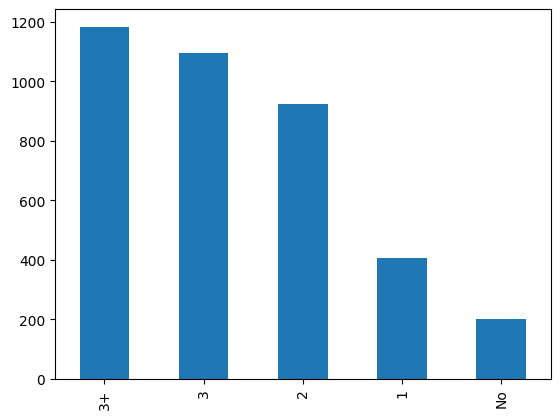

In [51]:
df['balconies'].value_counts().plot(kind='bar')

<Axes: ylabel='balconies'>

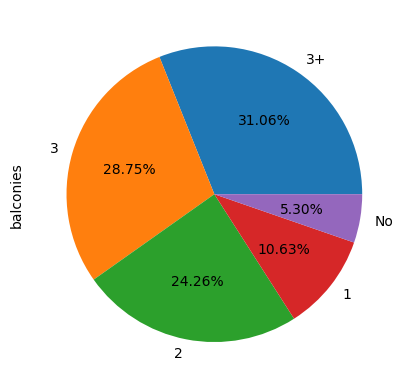

In [52]:
df['balconies'].value_counts().plot(kind='pie', autopct='%0.2f%%')

**OBSERCATIONS**
* No missing value
* ~80% of the property have at most 4 balconies

**FLOORNUM**

In [53]:
df['floorNum'].isnull().sum()

19

In [54]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price_in_cr,price_per_sq.ft,total_area,areaWithType,bedrooms,bathrooms,balconies,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study_room,servant_room,store_room,pooja_room,others,furnishing_type,luxury_score
3018,house,vipul tatvam villa,sector 48,8.50,26235.0,3240.0,Plot area 360(301.01 sq.m.),4,4,2,NaN,East,Moderately Old,NaN,3240.0,NaN,0,1,1,1,0,0,88
3045,house,independent,sector 2,5.60,17284.0,3240.0,Plot area 360(301.01 sq.m.),8,6,3+,NaN,South-West,Moderately Old,NaN,3240.0,NaN,1,1,1,1,0,0,0
3122,house,independent,sector 24,1.45,26852.0,540.0,Plot area 60(50.17 sq.m.),3,3,1,NaN,NaN,Old Property,NaN,540.0,NaN,0,0,0,0,0,0,9
3171,house,independent,sector 3,1.50,10288.0,1458.0,Plot area 162(135.45 sq.m.)Built Up area: 210 ...,3,3,No,NaN,NaN,Old Property,NaN,210.0,NaN,0,0,0,0,0,0,0
3189,house,independent,sector 3,4.12,8889.0,4635.0,Plot area 515(430.61 sq.m.),2,1,3+,NaN,NaN,Moderately Old,NaN,4635.0,NaN,0,0,0,0,0,0,0
3200,house,independent,sector 110,2.50,5472.0,4569.0,Plot area 4000(371.61 sq.m.),3,2,1,NaN,NaN,Old Property,NaN,4000.0,NaN,0,0,0,0,0,0,8
3259,house,independent,sector 3,0.65,11111.0,585.0,Plot area 65(54.35 sq.m.),4,2,2,NaN,NaN,Moderately Old,NaN,585.0,NaN,0,0,0,0,0,0,0
3282,house,ansal sushant lok plots,sector 43,3.30,26570.0,1242.0,Plot area 138(115.39 sq.m.),1,1,No,NaN,NaN,Under Construction,NaN,1242.0,NaN,0,0,0,0,0,0,0
3301,house,independent,sector 9,1.10,73333.0,150.0,Plot area 150(13.94 sq.m.),2,2,1,NaN,NaN,Old Property,NaN,150.0,NaN,0,0,0,0,1,0,0
3438,house,jacob pura,sector 12,0.35,9722.0,360.0,Built Up area: 360 (33.45 sq.m.),2,1,No,NaN,NaN,Old Property,NaN,360.0,NaN,0,0,0,0,0,0,0


In [55]:
df['floorNum'].describe()

count    3790.000000
mean        6.668338
std         5.999122
min         0.000000
25%         2.000000
50%         4.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: >

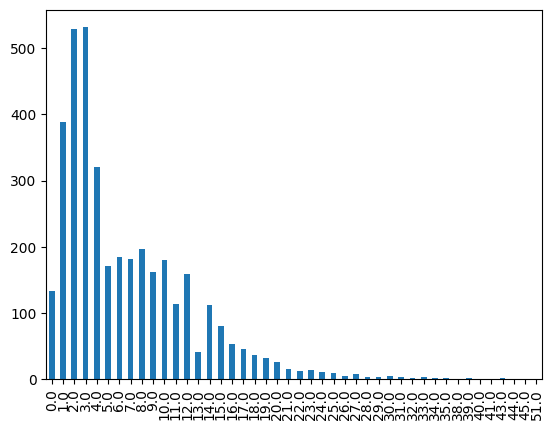

In [56]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: >

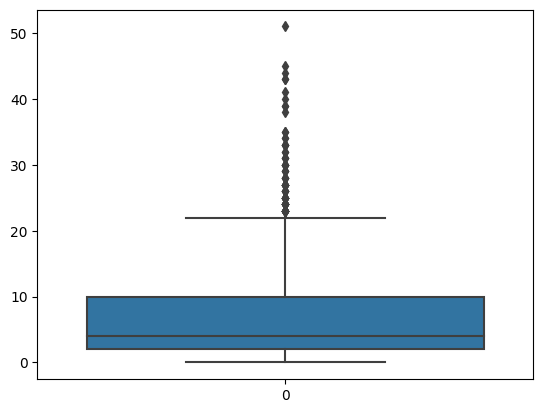

In [57]:
sns.boxplot(df['floorNum'])

**Observations**
* The majority of the properties lie between the ground floor (0) and the 25th floor.
* Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
* There are a few properties located at higher floors, but their frequency is much lower.
* The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
* Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

**FACING**

In [58]:
df['facing'].isnull().sum()

1107

In [59]:
df['facing'].fillna('NA', inplace=True)

In [60]:
df.facing.value_counts()

NA            1107
East           645
North-East     644
North          396
West           250
South          234
North-West     198
South-East     180
South-West     155
Name: facing, dtype: int64

**AGEPOSSESSION**

In [61]:
df['agePossession'].isnull().sum()

0

In [62]:
df['agePossession'].value_counts()

Relatively New        1667
New Property           608
Moderately Old         591
Undefined              464
Old Property           344
Under Construction     135
Name: agePossession, dtype: int64

**TOTAL_AREA-> SUPER_BUILT_UP_AREA**

In [63]:
df['super_built_up_area'].isnull().sum()

1916

In [64]:
df['super_built_up_area'].describe()

count     1893.000000
mean      1920.915240
std        765.408479
min         89.000000
25%       1465.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

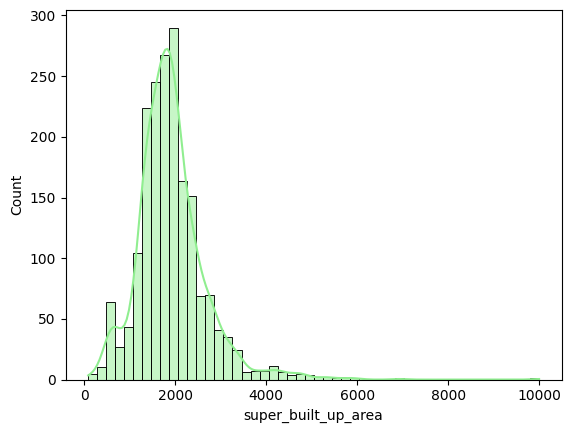

In [65]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, kde=True, color='lightgreen')

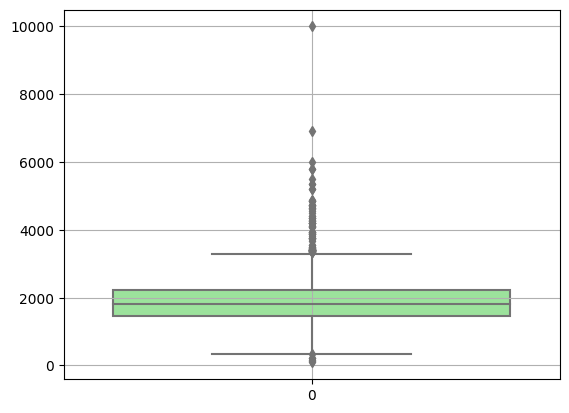

In [66]:
sns.boxplot(df['super_built_up_area'], color='lightgreen')
plt.grid()

In [67]:
lower_bound=df['super_built_up_area'].describe()['25%']
upper_bound=df['super_built_up_area'].describe()['75%']
print(lower_bound, upper_bound)

1465.0 2215.0


In [68]:
df[(df['super_built_up_area']<lower_bound) | (df['super_built_up_area']>upper_bound)].shape

(942, 23)

**Observations**
* Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
* There are a few properties with a significantly larger area, leading to a right-skewed distribution.
* The interquartile range (IQR) lies between roughly 1,465 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
* There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

**BUILT_UP_AREA**

In [69]:
df['built_up_area'].isnull().sum()

2026

In [70]:
df['built_up_area'].describe()

count      1783.000000
mean       2326.904447
std       17480.578490
min           2.000000
25%        1050.000000
50%        1620.000000
75%        2367.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

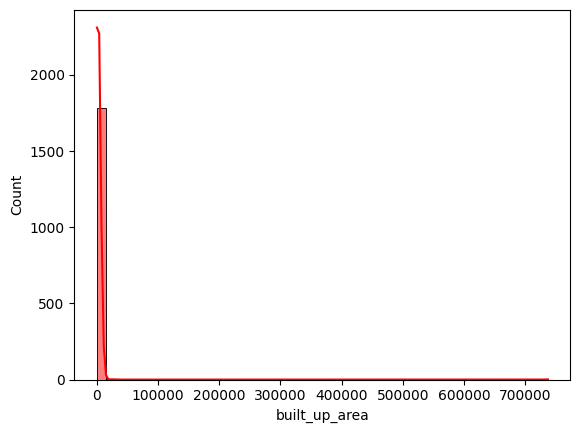

In [71]:
sns.histplot(df['built_up_area'].dropna(), kde=True, bins=50, color='red')

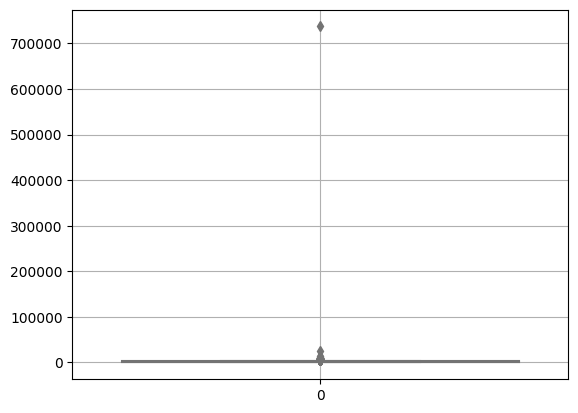

In [72]:
sns.boxplot(df['built_up_area'], color='lightgreen')
plt.grid()

In [73]:
df[(df['built_up_area']>500) | (df['built_up_area']<3500)].shape

(1783, 23)

**Observations**
* Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
* There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
* The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.
* The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

**CARPET_AREA**

In [74]:
df['carpet_area'].isnull().sum()

1884

In [75]:
df['carpet_area'].describe()

count      1925.000000
mean       2493.226518
std       22485.251129
min          15.000000
25%         822.000000
50%        1290.000000
75%        1785.000000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

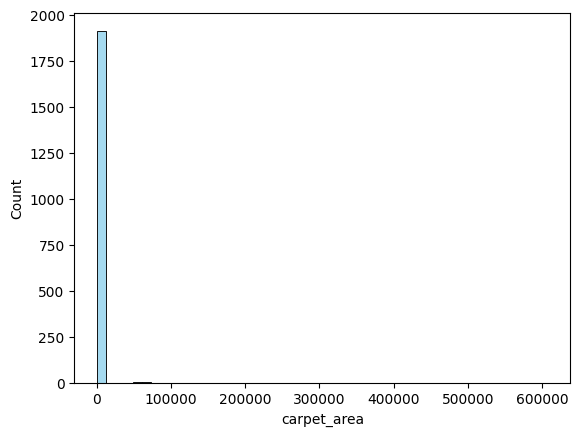

In [76]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: >

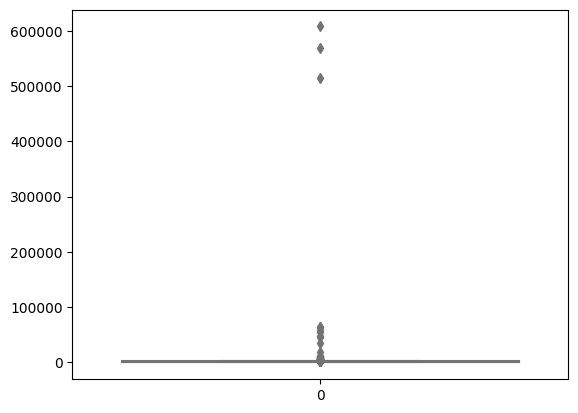

In [77]:
sns.boxplot(df['carpet_area'].dropna(), color='lightgreen')

In [78]:
df.iloc[:,16:]

,study_room,servant_room,store_room,pooja_room,others,furnishing_type,luxury_score
0,0,0,0,0,0,0,28
1,0,0,0,0,0,1,37
2,0,0,0,0,0,0,36
3,1,0,0,0,0,0,76
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
3935,1,1,0,1,0,0,69
3936,1,0,0,0,0,0,35
3937,1,1,0,0,0,0,70
3938,1,0,0,0,0,0,79


**ADDITIONAL_ROOM**

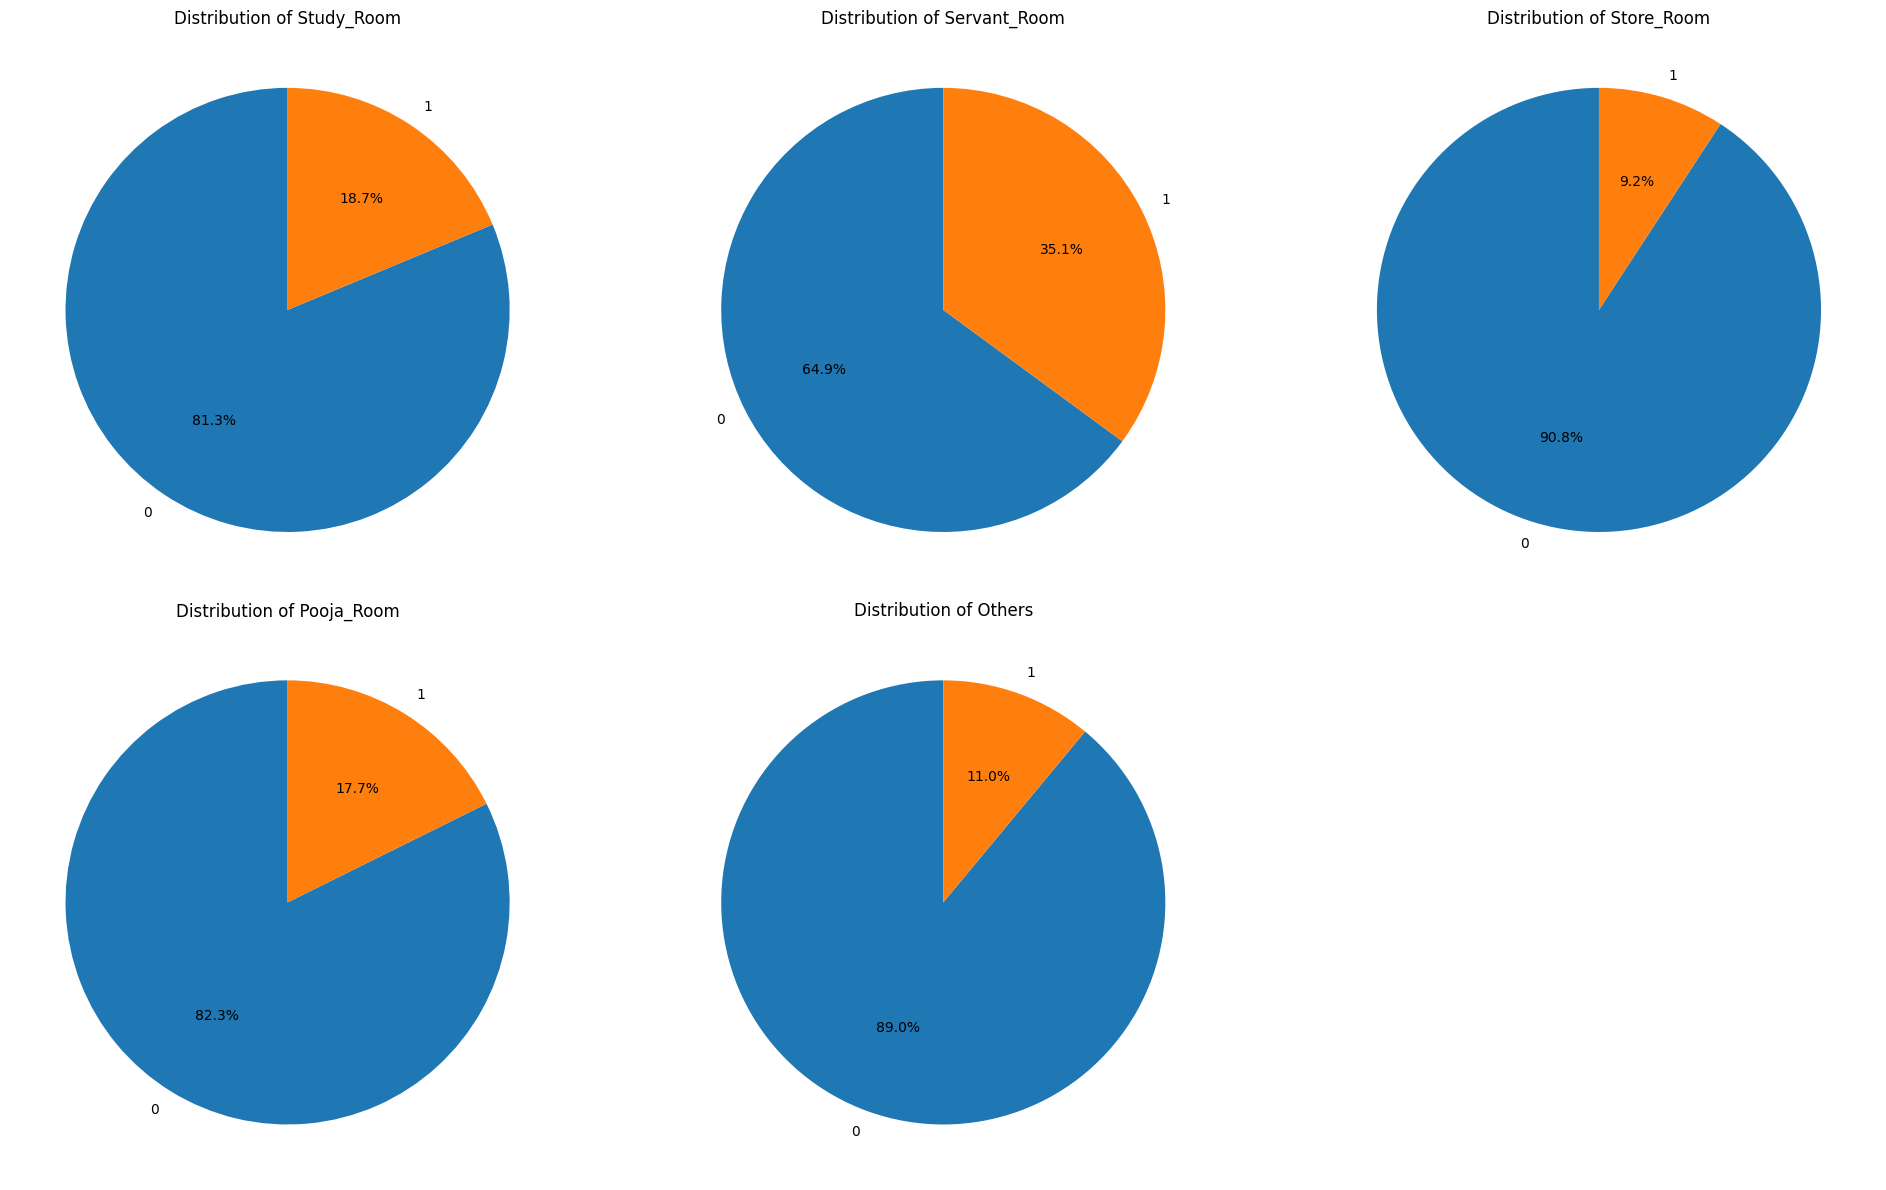

In [79]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study_room','servant_room','store_room','pooja_room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

**FURNISHING_TYPE**

In [80]:
df['furnishing_type'].isnull().sum()

0

In [81]:
df['furnishing_type'].value_counts()

0    2522
1    1080
2     207
Name: furnishing_type, dtype: int64

* 0 -> unfurnished
* 1 -> semifurnished
* 2 -> furnished

<Axes: ylabel='furnishing_type'>

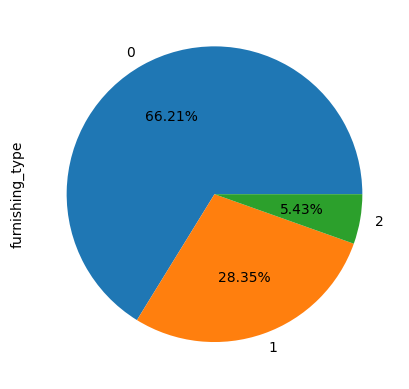

In [82]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

**LUXURY SCORE**

In [83]:
df['luxury_score'].describe()

count    3809.000000
mean       69.695721
std        53.300929
min         0.000000
25%        28.000000
50%        56.000000
75%       108.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

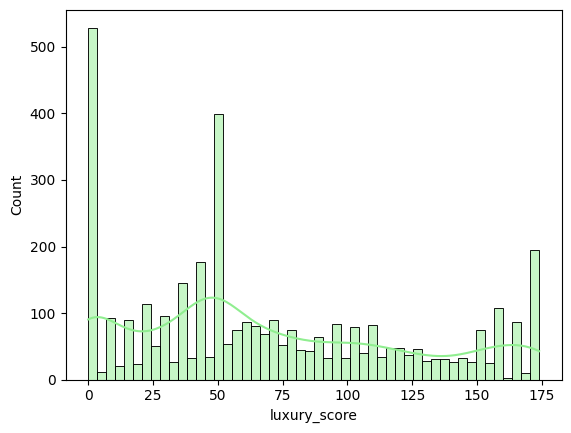

In [84]:
sns.histplot(df['luxury_score'],bins=50,kde=True, color='lightgreen')

<Axes: >

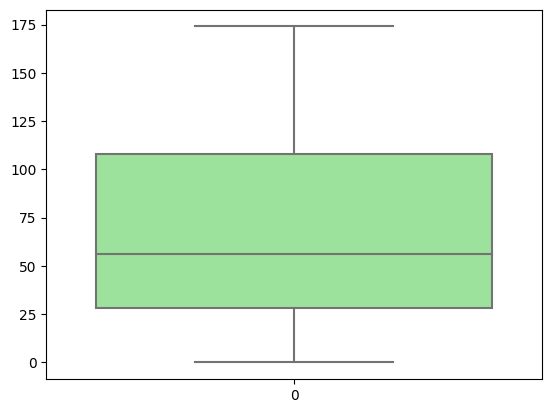

In [85]:
sns.boxplot(df['luxury_score'], color='lightgreen')

**Observations**
* The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

* The box plot reveals that the majority of the properties have luxury scores between approximately 25 and 115. The interquartile range (IQR) lies between these values.

In [86]:
df.head()

,property_type,society,sector,price_in_cr,price_per_sq.ft,total_area,areaWithType,bedrooms,bathrooms,balconies,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study_room,servant_room,store_room,pooja_room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 3,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,4.0,West,Relatively New,NaN,NaN,900.0,0,0,0,0,0,0,28
1,flat,apna enclave,sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,1.0,West,Old Property,NaN,NaN,650.0,0,0,0,0,0,1,37
2,flat,tulsiani easy in homes,sector 35,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,12.0,NA,New Property,NaN,NaN,595.0,0,0,0,0,0,0,36
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,2.0,NA,Undefined,NaN,NaN,1200.0,1,0,0,0,0,0,76
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2,2,3,5.0,NA,Under Construction,1345.0,NaN,NaN,1,0,0,0,0,0,0


In [87]:
df.shape

(3809, 23)

In [88]:
df.to_csv('eda_univariate_performed.csv',index=False)